In [3]:
import pandas as pd
from pandas_datareader import data

### Intro to Visualization Module

In [4]:
import matplotlib.pyplot as plt   
## This usually render the output plot outside the jupyter notebook, we can control to inside jupyter notebook
%matplotlib inline

### The .plot() Methods

In [9]:
## .plot() function can directly applied on the pandas Series or dataframe
bb = data.DataReader(name ='BBRY' , data_source = 'google', start = '2007-07-01', end = '2008-12-31')
bb.head(3)

In [10]:
bb = pd.read_csv('BB.csv', index_col = 'Date', parse_dates = ['Date']).drop('Adj Close', axis = 'columns')
bb.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2007-07-02,67.323334,71.800003,66.356667,71.419998,56580300
2007-07-03,71.826668,72.296669,68.800003,69.313332,26506800
2007-07-05,72.153336,72.433334,69.669998,72.063332,39750300


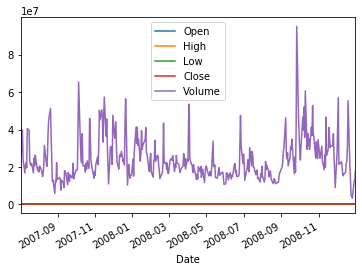

In [9]:
bb.plot()
##  The pandas dataframe index has become the x-axis, Volume is the only one present on this graph(reason is Volume's scale is two large)

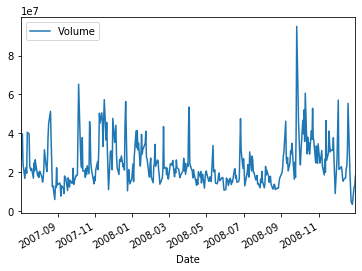

In [10]:
bb.plot(y = 'Volume')

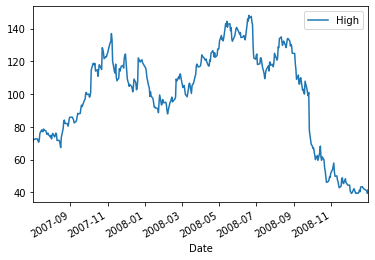

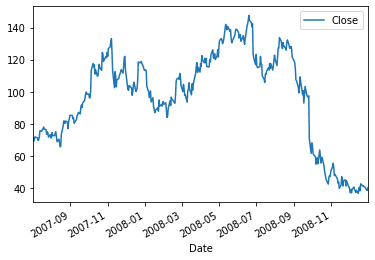

In [14]:
bb.plot(y = 'High')
bb.plot(y = 'Close')   ## the plot will be on the bottom of the other

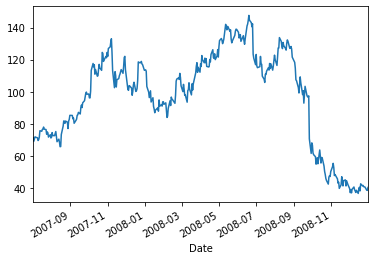

In [15]:
## Another way to plot the Series
bb['Close'].plot()  ## default of style use

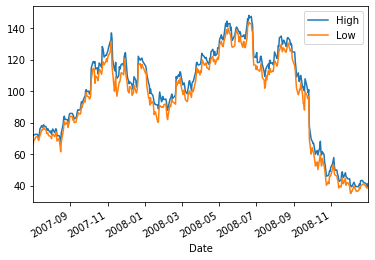

In [16]:
bb[['High', 'Low']].plot()  ## plot two series with similar scale

### Modifying Aesthetics with Templates

In [17]:
plt.style.available   ## This returns the available templates that are available within the styles of matplotlib

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

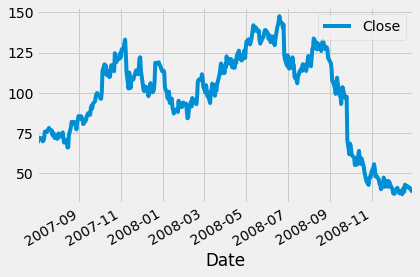

In [11]:
## bb.plot(y = 'Close')  ## default
plt.style.use('fivethirtyeight')  
## this style will be applied to all plots in this notebook, so if want to display different, need to specify everytime
bb.plot(y = 'Close')

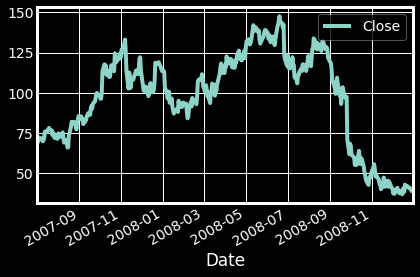

In [26]:
plt.style.use('dark_background')
bb.plot(y = 'Close')

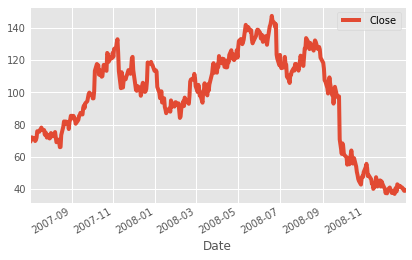

In [16]:
plt.style.use('ggplot')
bb.plot(y = 'Close')

### Bar Graphs

In [ ]:
data.DataReader(name = 'GOOG', data_source = 'google', start = '2004-01-01', end = '2016-12-31')

In [5]:
google  =pd.read_csv('GOOG.csv', index_col = 'Date', parse_dates = ['Date']).drop('Adj Close', axis = 'columns')
google.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,18342800


In [14]:
def rank_performance(stock_price):
    if stock_price <= 200:
        return 'Poor'
    elif stock_price > 200 and stock_price <= 500:
        return 'Satisfactory'
    else:
        return 'Stellar'

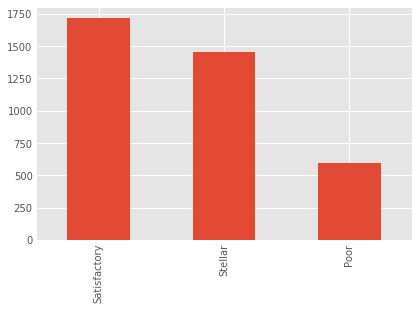

In [17]:
google['Close'].apply(rank_performance).value_counts().plot(kind = 'bar')

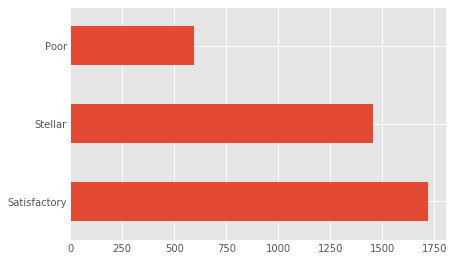

In [49]:
google['Close'].apply(rank_performance).value_counts().plot(kind = 'barh')  ## horizontal bar graph

### Pie Charts

In [ ]:
apple = data.DataReader(name='AAPL', data_source='google', start = '2012-01-01', end = '2016-12-31')

In [52]:
apple = pd.read_csv('AAPL.csv', index_col = 'Date', parse_dates = ['Date']).drop(['Adj Close', 'Company'], axis = 'columns')
apple.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,67817400


In [54]:
apple['Close'].mean()

93.36171921939602

In [55]:
def rank_performance(stock_price):
    if stock_price >= 93.36171921939602:
        return 'Above Average'
    else:
        return 'Below Average'

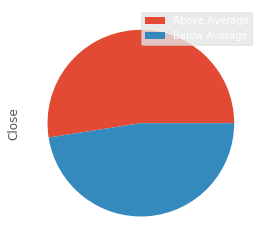

In [57]:
apple['Close'].apply(rank_performance).value_counts().plot(kind = 'pie', legend = True)

### Histograms

In [7]:
## use google data again
## create 100 buckets
def custom_round(stock_price):
    return int(stock_price / 100.0) * 100

## This function will round down the closest value of 100

In [61]:
custom_round(46.55)  ## return 0
custom_round(110.09)  ## return 100
custom_round(199.99)  ## return 100
custom_round(388.1)  ## return 300

300

In [65]:
google['High'].apply(custom_round).value_counts().sort_index()

0        159
100      414
200     1132
300      447
400      157
500      415
600      106
700      276
800       89
900      127
1000     177
1100     199
1200      74
Name: High, dtype: int64

In [8]:
google['High'].apply(custom_round).nunique()   ## There are 13 buckets for my histogram 

13

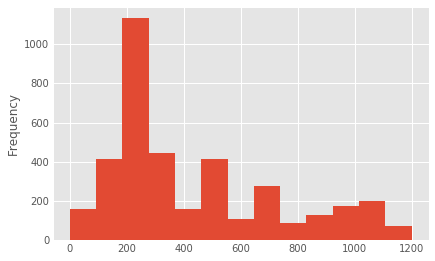

In [23]:
google['High'].apply(custom_round).plot(kind = 'hist', bins = 13)  ## put the bins = number might make plot better look